In [1]:
import pandas as pd
import numpy as np

In [2]:
base = pd.read_csv('/content/fakes1000.csv')

In [3]:
base.shape

(2000, 2)

In [4]:
base.head()

class                                               Text
0   True   Algunas de las voces extremistas más conocida...
1   True   Después de casi dos años y medio de luchas po...
2   True   Dos periodistas birmanos de la agencia Reuter...
3   True   El Cuerpo Nacional de Policía ha detenido a c...
4   True   El desfile de la firma en Roma se convierte e...

In [5]:
data = base['Text'].tolist()

In [6]:
#data

In [7]:
pattern = r'''(?x)                  # Flag para iniciar el modo verbose
              (?:[A-Z]\.)+          # Hace match con abreviaciones como U.S.A.
              | \w+(?:-\w+)*        # Hace match con palabras que pueden tener un guión interno
              | \$?\d+(?:\.\d+)?%?  # Hace match con dinero o porcentajes como $15.5 o 100%
              | \.\.\.              # Hace match con puntos suspensivos
              | [][.,;"'?():-_`]    # Hace match con signos de puntuación
'''

In [8]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [9]:
texto = []

for x in range(0, len(data)):
  token_1 = data[x].lower() #convierte a minúsculas
  token_2 = nltk.regexp_tokenize(token_1,pattern) #Quita los patrones definidos arriba y genera tokens
  texto.append(token_2)

In [10]:
#texto

In [11]:
flatten = [ w for l in texto for w in l]

In [12]:
#flatten

# Limpieza

In [13]:
import string
puntuacion = list(string.punctuation) #Creamos una lista de los signos de puntuación

In [14]:
#puntuacion

# Stop Words

In [15]:
nltk.download('stopwords')
newStopWords = list(nltk.corpus.stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
#newStopWords

Quitamos las stopwords pasandolas por un ciclo for

In [17]:
df = [w for w in flatten if w not in newStopWords]

Quitamos los signos de puntuación, también pasándolos por un ciclo for

In [18]:
df_2 = [w for w in df if w not in puntuacion]

In [19]:
fw = nltk.FreqDist(df_2)

In [20]:
fw.most_common(20)

[('años', 207),
 ('según', 193),
 ('gobierno', 171),
 ('españa', 167),
 ('si', 146),
 ('tras', 142),
 ('año', 112),
 ('ser', 110),
 ('madrid', 105),
 ('sido', 102),
 ('pasado', 99),
 ('personas', 96),
 ('dos', 91),
 ('presidente', 89),
 ('euros', 89),
 ('hoy', 88),
 ('inmigrantes', 87),
 ('...', 87),
 ('día', 86),
 ('policía', 85)]

In [21]:
word_com = fw.most_common(50)

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [23]:
df_2

['voces',
 'extremistas',
 'conocidas',
 'ee',
 'uu',
 'cuentas',
 'asociadas',
 'movimiento',
 'conocida',
 'alt-right',
 'ligadas',
 'grupos',
 'antisemitas',
 'xenófobos',
 'sido',
 'eliminadas',
 'plumazo',
 'redes',
 'sociales',
 'facebook',
 'instagram',
 'trat',
 'después',
 'casi',
 'dos',
 'años',
 'medio',
 'luchas',
 'políticas',
 'judiciales',
 'donald',
 'trump',
 'presentado',
 'hoy',
 'proyecto',
 'inmigración',
 'unidos',
 'proyecto',
 'elaborado',
 'yerno',
 'asesor',
 'donald',
 'trump',
 'jared',
 'kushner',
 'sólo',
 'concreta',
 'cosa',
 'dos',
 'periodistas',
 'birmanos',
 'agencia',
 'reuters',
 'liberados',
 'martes',
 'recibir',
 'perdón',
 'presidente',
 'país',
 'tras',
 'pasar',
 'año',
 'medio',
 'prisión',
 'revelar',
 'matanza',
 'ejército',
 'minoría',
 'musulmana',
 'rohingya',
 'wa',
 'lone',
 'kyaw',
 'soe',
 'oo',
 'cuerpo',
 'nacional',
 'policía',
 'detenido',
 'cuatro',
 'personas',
 'acusadas',
 'formar',
 'parte',
 'grupo',
 'criminal',
 'dedica

**Nube de palabras**

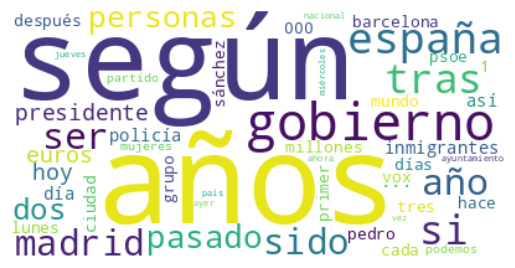

In [24]:
wordcloud = WordCloud(background_color='white', collocations=False, max_words=50).fit_words(fw)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
sentiment_scores = [analyzer.polarity_scores(text) for text in data]
display(sentiment_scores[:10])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.942, 'pos': 0.058, 'compound': 0.34},
 {'neg': 0.049, 'neu': 0.951, 'pos': 0.0, 'compound': -0.2732},
 {'neg': 0.079, 'neu': 0.864, 'pos': 0.056, 'compound': -0.25},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.885, 'pos': 0.115, 'compound': 0.5859},
 {'neg': 0.057, 'neu': 0.885, 'pos': 0.059, 'compound': 0.0258},
 {'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'compound': 0.5859},
 {'neg': 0.0, 'neu': 0.879, 'pos': 0.121, 'compound': 0.5859},
 {'neg': 0.08, 'neu': 0.867, 'pos': 0.053, 'compound': -0.296}]

In [26]:
analyzer.polarity_scores("I feel so tired") #explica el sentimiento de la frase

{'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'compound': -0.4927}

In [27]:
def sentiment_analyzer_scores(text):
  score = analyzer.polarity_scores(text)
  comp = score['compound']
  if comp >= 0.05:
    return 1
  elif (comp > -0.05) and (comp<0.05):
    return 0
  else:
    return -1

**Nueva columna con sentimiento**

In [28]:
base['sentimiento'] = base['Text'].apply(sentiment_analyzer_scores)
display(base.head())

class                                               Text  sentimiento
0   True   Algunas de las voces extremistas más conocida...            0
1   True   Después de casi dos años y medio de luchas po...            1
2   True   Dos periodistas birmanos de la agencia Reuter...           -1
3   True   El Cuerpo Nacional de Policía ha detenido a c...           -1
4   True   El desfile de la firma en Roma se convierte e...            0

**Gráfica de frecuencia de sentimiento**

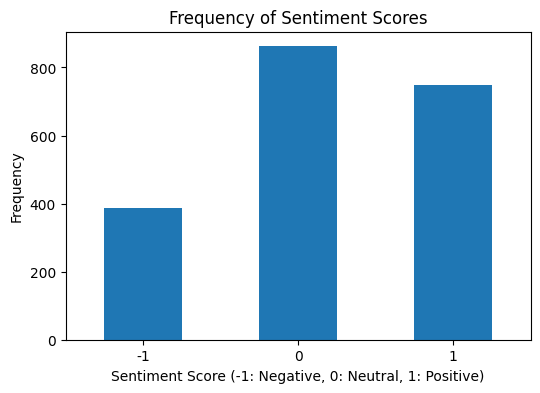

In [29]:
import matplotlib.pyplot as plt

sentiment_counts = base['sentimiento'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar')
plt.title('Frequency of Sentiment Scores')
plt.xlabel('Sentiment Score (-1: Negative, 0: Neutral, 1: Positive)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()